In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from bicon import data_preprocessing
#from bicon import BiCoN
#from bicon import results_analysis
# import mygene
import umap
import seaborn as sns

/nfs/home/students/l.willruth/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#tpms
variants_samples_path = "../data/covid_variants_tpms.tsv"
variants_df = pd.read_csv(variants_samples_path,sep="\t")
ischgl_samples_path ="../data/ischgl_tpms.tsv"
ischgl_df = pd.read_csv(ischgl_samples_path,sep="\t")
nuns_samples_path ="../data/nuns_tpms.tsv"
nuns_df = pd.read_csv(nuns_samples_path,sep="\t")
omicron_samples_path = "../data/omikron_tpms.tsv"
omicron_df = pd.read_csv(omicron_samples_path,sep="\t")
#genecounts
variants_samples_geneCounts_path = "../data/covid_variants_geneCounts.tsv"
variants_geneCounts_df = pd.read_csv(variants_samples_geneCounts_path,sep="\t")
ischgl_samples_geneCounts_path ="../data/ischgl_geneCounts.tsv"
ischgl_geneCounts_df = pd.read_csv(ischgl_samples_geneCounts_path,sep="\t")
nuns_samples_geneCounts_path ="../data/nuns_geneCounts.tsv"
nuns_geneCounts_df = pd.read_csv(nuns_samples_geneCounts_path,sep="\t")
omicron_samples_geneCounts_path = "../data/omikron_geneCounts.tsv"
omicron_geneCounts_df = pd.read_csv(omicron_samples_geneCounts_path,sep="\t")

In [3]:
ischgl_df

,gene_id,gene_name,A_100_Asymptom,A_1069_Asymptom,A_1070_Asymptom,A_1093_Asymptom,A_1109_Asymptom,A_118_Asymptom,A_1195_Asymptom,A_128_Asymptom,...,C_407_Healthy,C_413_Healthy,D_11_Mild,D_15_Mild,D_18_Mild,D_2100_Mild,E_12_Seronegative,E_13_Seronegative,E_16_Seronegative,E_17_Seronegative
0,ENSG00000000003,TSPAN6,0.344989,0.231768,0.033604,0.068793,0.293098,0.077037,0.161779,0.174456,...,0.048719,0.098274,0.086459,0.192108,0.148663,0.014973,0.357772,0.187879,0.300370,0.188353
1,ENSG00000000005,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,DPM1,57.557069,51.273445,48.245862,53.021395,49.573834,68.180839,59.667894,60.014980,...,58.429858,51.729881,54.793528,53.218174,61.773168,70.516439,54.876829,49.384066,57.014467,55.097013
3,ENSG00000000457,SCYL3,5.253534,9.868319,8.525083,9.785390,7.679584,7.183678,7.481506,4.414730,...,6.819640,6.607845,4.491875,10.912064,11.386730,6.443750,13.033684,11.610696,13.062581,11.571248
4,ENSG00000000460,C1orf112,4.448392,7.371385,5.100912,4.948695,3.353833,2.911466,6.600832,5.035663,...,5.286277,6.980615,3.179634,5.946841,5.035819,5.243298,5.276323,5.234113,4.837665,5.670196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000288459,AL512357.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60619,ENSG00000288460,AL138899.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60620,ENSG00000288473,AL669830.1,0.000000,0.061825,0.000000,0.067097,0.053133,0.000000,0.000000,0.000000,...,0.043215,0.006840,0.051173,0.000000,0.064558,0.000000,0.038684,0.034447,0.009945,0.041734
60621,ENSG00000288484,AC091135.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
variants_df

,gene_id,gene_name,B.1.351.ID14_1st,B.1.351.ID14_2nd,B.1.351.ID1_1st,B.1.351.ID1_2nd,B.1.351.ID1_3rd,B.1.351.ID24_1st,B.1.351.ID24_2nd,B.1.351.ID24_3rd,...,ID69_1st,ID69_2nd,ID70_1st,ID70_2nd,ID71_1st,ID71_2nd,ID72_1st,ID72_2nd,ID8_1st,ID8_2nd
0,ENSG00000000003,TSPAN6,0.046247,0.082143,0.028807,0.121008,0.093861,0.026129,0.036595,0.342078,...,0.000000,0.052797,0.014159,0.025377,0.008956,0.035839,0.000000,0.064265,0.129459,0.006392
1,ENSG00000000005,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,DPM1,62.529784,65.257510,46.440504,38.288930,46.842467,58.425316,43.220758,41.019925,...,53.968352,44.961783,48.445263,66.387422,53.560896,56.132341,53.472910,57.954252,66.976601,58.110559
3,ENSG00000000457,SCYL3,12.843863,11.163908,9.959857,5.260185,3.174045,9.115296,6.268970,6.390609,...,8.417664,9.757675,17.716004,3.726533,7.263261,9.018073,6.708304,4.174286,13.682174,8.823701
4,ENSG00000000460,C1orf112,5.752838,5.882111,4.877415,3.050831,3.261627,3.896096,2.689669,4.190675,...,7.598370,7.785986,3.944909,3.226013,7.577474,5.353596,4.258821,3.705588,6.509680,4.533830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000288459,AL512357.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60619,ENSG00000288460,AL138899.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60620,ENSG00000288473,AL669830.1,0.057070,0.073113,0.028071,0.000000,0.024125,0.000000,0.046232,0.013855,...,0.017674,0.007760,0.000000,0.019303,0.006947,0.006944,0.034499,0.000000,0.021865,0.025910
60621,ENSG00000288484,AC091135.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
nuns_df

,gene_id,gene_name,BNT_Convalescent_10_Day0,BNT_Convalescent_10_Day1,BNT_Convalescent_11_Day0,BNT_Convalescent_11_Day1,BNT_Convalescent_11_Day7,BNT_Convalescent_12_Day0,BNT_Convalescent_12_Day1,BNT_Convalescent_12_Day7,...,BNT_Naive_7_Day7,BNT_Naive_8_Day0,BNT_Naive_8_Day10,BNT_Naive_8_Day34,BNT_Naive_8_Day41,BNT_Naive_9_Day0,BNT_Naive_9_Day10,BNT_Naive_9_Day34,BNT_Naive_9_Day35,BNT_Naive_9_Day41
0,ENSG00000000003,TSPAN6,0.104917,0.068850,0.067497,0.099140,0.128558,0.036129,0.038538,0.080607,...,0.179322,0.082909,0.030271,0.031823,0.134746,0.083012,0.078530,0.134113,0.033125,0.072812
1,ENSG00000000005,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.004888,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,DPM1,28.346136,31.057488,29.622579,41.887214,55.280769,31.698545,39.999589,37.937168,...,46.868668,37.684579,40.805523,29.826335,50.039835,36.335150,41.074113,45.108029,38.479182,41.714915
3,ENSG00000000457,SCYL3,5.435278,6.955359,6.028061,8.153856,3.632685,4.566719,6.949027,6.969273,...,9.912327,7.277725,8.968639,5.136628,8.755636,6.454421,9.328892,6.048257,5.736111,7.237471
4,ENSG00000000460,C1orf112,2.303422,2.644600,2.627126,2.720502,2.719267,2.797451,3.447028,4.092898,...,4.970146,4.610765,5.732586,1.722233,3.341036,4.334523,5.836880,1.923765,1.770476,2.777326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000288459,AL512357.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60619,ENSG00000288460,AL138899.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60620,ENSG00000288473,AL669830.1,0.516294,0.381439,0.000000,0.000000,0.009633,0.016639,0.007332,0.009048,...,0.053566,0.279846,0.327858,0.318621,0.615583,0.034264,0.068522,0.049863,0.008022,0.021344
60621,ENSG00000288484,AC091135.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
omicron_df

,gene_id,gene_name,SRR18922919_COVID.19.Omicron_BA.1,SRR18922920_COVID.19.Omicron_BA.1,SRR18922921_COVID.19.Omicron_BA.1,SRR18922922_COVID.19.Omicron_BA.1,SRR18922923_COVID.19.Omicron_BA.1,SRR18922924_COVID.19.Omicron_BA.1,SRR18922925_COVID.19.Omicron_BA.1,SRR18922926_COVID.19.Omicron_BA.1,...,SRR18922964_COVID.19.Omicron_BA.1,SRR18922965_COVID.19.Omicron_BA.1,SRR18922966_Healthy.control_..,SRR18922967_Healthy.control_..,SRR18922968_Healthy.control_..,SRR18922969_Healthy.control_..,SRR18922970_Healthy.control_..,SRR18922971_Healthy.control_..,SRR18922972_Healthy.control_..,SRR18922973_Healthy.control_..
0,ENSG00000000003,TSPAN6,0.210224,0.116474,0.156680,0.079545,0.150085,0.054169,0.048972,0.157329,...,0.026690,0.006214,0.131483,0.122396,0.070452,0.106001,0.206844,0.190777,0.401114,0.101819
1,ENSG00000000005,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,DPM1,32.926781,36.918208,51.786198,53.425387,44.316353,46.250621,44.153909,37.074863,...,28.993144,20.007186,38.723439,38.127384,41.474080,33.069088,32.816331,37.893230,34.805696,37.566477
3,ENSG00000000457,SCYL3,7.409683,8.726819,10.117906,9.151828,10.338311,8.937326,6.225856,8.961049,...,6.236894,3.073827,9.392764,9.313570,5.360204,8.144275,5.357745,8.041574,8.144044,7.992140
4,ENSG00000000460,C1orf112,3.772172,5.284382,6.004323,4.738773,4.579037,4.839665,3.543801,5.166392,...,4.484576,3.339469,3.675380,3.726333,1.888396,3.546704,2.915497,4.229521,3.620894,3.442689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000288459,AL512357.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60619,ENSG00000288460,AL138899.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60620,ENSG00000288473,AL669830.1,0.018878,0.023804,0.076245,0.051047,0.036714,0.053083,0.026226,0.293869,...,0.023268,0.051583,0.070165,0.025115,0.000000,0.016964,0.000000,0.028157,0.017074,0.000000
60621,ENSG00000288484,AC091135.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# with pd.option_context('display.max_rows', 244, 'display.max_columns', 106):  # more options can be specified also
#     print(ischgl_geneCounts_df)

In [8]:
# variants_geneCounts_df

**exclude some data:**

In [9]:
# delete some data, which is not suitable!

# Beta ID14 sampling 1 was taken -1 day
variants_df=variants_df.drop("B.1.351.ID14_1st",1)
variants_geneCounts_df=variants_geneCounts_df.drop("B.1.351.ID14_1st",1)

# samples that failed QC or are excluded due to similar reasons
samples_to_drop_variants = ['ID43_1st','B.1.351.ID5_3rd','B.1.351.ID1_3rd','ID29_2nd','ID34_2nd','ID38_3rd', 'ID53_2nd','BNT_Aus_20_2','ID38_2nd','ID38_3rd','ID38_1st']
samples_to_drop_ischgl = ['A_118_Asymptom', 'B_425_Seronegative','B_436_Seronegative','B_446_Seronegative']
samples_to_drop_nuns = ["BNT_Convalescent_4_Day7", "BNT_Convalescent_9_Day0", "BNT_Convalescent_9_Day1", "BNT_Convalescent_9_Day7", "BNT_Convalescent_13_Day0", "BNT_Convalescent_2_Day0", "BNT_Convalescent_3_Day0", "BNT_Naive_13_Day34", "BNT_Naive_13_Day41"]
samples_to_drop_omicron = ["SRR18922948_COVID.19.Omicron_BA.1"]

variants_df=variants_df.drop(columns=samples_to_drop_variants)
variants_geneCounts_df=variants_geneCounts_df.drop(columns=samples_to_drop_variants)

ischgl_df=ischgl_df.drop(samples_to_drop_ischgl,1)
ischgl_geneCounts_df=ischgl_geneCounts_df.drop(samples_to_drop_ischgl,1)

nuns_df=nuns_df.drop(samples_to_drop_nuns,1)
nuns_geneCounts_df=nuns_geneCounts_df.drop(samples_to_drop_nuns,1)

omicron_df=omicron_df.drop(samples_to_drop_omicron,1)
omicron_geneCounts_df=omicron_geneCounts_df.drop(samples_to_drop_omicron,1)

/tmp/ipykernel_2080174/3378235511.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_df=variants_df.drop("B.1.351.ID14_1st",1)
/tmp/ipykernel_2080174/3378235511.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_geneCounts_df=variants_geneCounts_df.drop("B.1.351.ID14_1st",1)
/tmp/ipykernel_2080174/3378235511.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ischgl_df=ischgl_df.drop(samples_to_drop_ischgl,1)
/tmp/ipykernel_2080174/3378235511.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ischgl_geneCounts_df=ischgl_geneCounts_df.drop(samples_to_drop_ischgl,1)
/tmp/ipykernel_2080174/3378235511.py:19: FutureWarning

**create metadata df**

In [10]:
#create meta data
meta = pd.DataFrame(columns = ["old_id", "sample_id", "patient", "group", "sampling","infected"])
meta

,old_id,sample_id,patient,group,sampling,infected


In [11]:
# drop some samples of certain group

# VARIANTS: drops samples for infections 3rd and for vaccinations 1st
drop_third_sampling= False
drop_vaccinated_infected = False
drop_all_betas = True
drop_all_gammas = False

# NUNS:
drop_day0 = False

In [12]:
#create right header for ischgl
ischgl_head = list(ischgl_df.columns)
ischgl_head_new = []
debug_whatever =[]

for colname in ischgl_head:
    split = colname.split("_")
    if len(split) < 3:
        ischgl_head_new.append(colname)
    if split[0] == 'A':
        n_name = "Asymptom_ID" + split[1] + "_1st"
        ischgl_head_new.append(n_name)
        id_to_add="ID"+split[1]
        meta_append_df={"old_id":colname,"sample_id":n_name,"patient":id_to_add,"group":"Asymptom","sampling":"1st","infected":"Control"}
        meta=meta.append(meta_append_df, ignore_index = True)
    if split[0] == 'B':
        n_name = "Seronegative_ID" + split[1] + "_1st"
        ischgl_head_new.append(n_name)
        id_to_add="ID"+split[1]
        meta_append_df={"old_id":colname,"sample_id":n_name,"patient":id_to_add,"group":"Seronegative","sampling":"1st","infected":"Control"}
        meta=meta.append(meta_append_df, ignore_index = True)
    if split[0] == 'C':
        n_name = "Healthy_ID" + split[1] + "_1st"
        ischgl_head_new.append(n_name)
        id_to_add="ID"+split[1]
        meta_append_df={"old_id":colname,"sample_id":n_name,"patient":id_to_add,"group":"Healthy","sampling":"1st","infected":"Control"}
        meta=meta.append(meta_append_df, ignore_index = True)
    if split[0] == 'D':
        n_name = "Mild_ID" + split[1] + "_1st"
        ischgl_head_new.append(n_name)
        id_to_add="ID"+split[1]
        meta_append_df={"old_id":colname,"sample_id":n_name,"patient":id_to_add,"group":"Mild","sampling":"1st","infected":"Control"}
        meta=meta.append(meta_append_df, ignore_index = True)
    if split[0] == 'E':
        n_name = "Seronegative_ID" + split[1] + "_1st"
        ischgl_head_new.append(n_name)
        id_to_add="ID"+split[1]
        meta_append_df={"old_id":colname,"sample_id":n_name,"patient":id_to_add,"group":"Seronegative","sampling":"1st","infected":"Control"}
        meta=meta.append(meta_append_df, ignore_index = True)
ischgl_df.columns = ischgl_head_new
ischgl_geneCounts_df.columns = ischgl_head_new

/tmp/ipykernel_2080174/3843349272.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3843349272.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3843349272.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3843349272.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3843349272.py:15: FutureWarning: The frame.append method 

In [13]:
meta[0:50]

,old_id,sample_id,patient,group,sampling,infected
0,A_100_Asymptom,Asymptom_ID100_1st,ID100,Asymptom,1st,Control
1,A_1069_Asymptom,Asymptom_ID1069_1st,ID1069,Asymptom,1st,Control
2,A_1070_Asymptom,Asymptom_ID1070_1st,ID1070,Asymptom,1st,Control
3,A_1093_Asymptom,Asymptom_ID1093_1st,ID1093,Asymptom,1st,Control
4,A_1109_Asymptom,Asymptom_ID1109_1st,ID1109,Asymptom,1st,Control
5,A_1195_Asymptom,Asymptom_ID1195_1st,ID1195,Asymptom,1st,Control
6,A_128_Asymptom,Asymptom_ID128_1st,ID128,Asymptom,1st,Control
7,A_1526_Asymptom,Asymptom_ID1526_1st,ID1526,Asymptom,1st,Control
8,A_1574_Asymptom,Asymptom_ID1574_1st,ID1574,Asymptom,1st,Control
9,A_1_Asymptom,Asymptom_ID1_1st,ID1,Asymptom,1st,Control


**change variants header**

In [14]:
#create right header for variants

variants_head =  list(variants_df.columns)
variants_head_new = []

rest_mapping_df = pd.read_csv("../data/covid_variants_names_to_samples.csv",sep="\t")
rest_mapping_df = rest_mapping_df.set_index('ID')
rest_mapping_df = rest_mapping_df.to_dict(orient="index")

betas = []
BNTs = []
rest = []

for colname in variants_head:
    if colname.startswith("gene"):
        variants_head_new.append(colname)
    elif colname.startswith("B.1"):
        betas.append(colname)
    elif colname.startswith("BNT"):
        BNTs.append(colname)
    else:
        rest.append(colname)

for beta in betas:
    split = beta.split(".")
    n_name = "Beta_"+split[3]
    
    split_sampling=split[3].split("_")
    id_to_add=split_sampling[0]
    
    #in beta group some are vaccinated and could interfere with the results!
    ids_of_vaccinated_individualts = []
    ids_of_vaccinated_individualts.append("ID2")
    ids_of_vaccinated_individualts.append("ID3")
    ids_of_vaccinated_individualts.append("ID4")
    ids_of_vaccinated_individualts.append("ID5")
    
    if drop_all_betas:
            variants_df=variants_df.drop(beta,1)
            variants_geneCounts_df = variants_geneCounts_df.drop(beta,1)
            continue
    
    if drop_vaccinated_infected:
        if id_to_add in ids_of_vaccinated_individualts:
            variants_df=variants_df.drop(beta,1)
            variants_geneCounts_df = variants_geneCounts_df.drop(beta,1)
            continue
    
    if drop_third_sampling:
        if split_sampling[1] == "3rd":
                variants_df=variants_df.drop(beta,1)
                variants_geneCounts_df = variants_geneCounts_df.drop(beta,1)
        else:
            variants_head_new.append(n_name)
            split_sampling=split[3].split("_")
            id_to_add=split_sampling[0]
            meta_append_df={"old_id":beta,"sample_id":n_name,"patient":id_to_add,"group":"Beta","sampling":split_sampling[1],"infected":"Infected"}
            meta=meta.append(meta_append_df, ignore_index = True)
    else:
        variants_head_new.append(n_name)
        split_sampling=split[3].split("_")
        id_to_add=split_sampling[0]
        meta_append_df={"old_id":beta,"sample_id":n_name,"patient":id_to_add,"group":"Beta","sampling":split_sampling[1],"infected":"Infected"}
        meta=meta.append(meta_append_df, ignore_index = True)

for bnt in BNTs:
    split = bnt.split("_")
    n_name = "Biontech_ID" + split[2] + "_"
    sampling=""
    if split[3] == '1':
        n_name = n_name + "1st"
        sampling="1st"
    if split[3] == '2':
        n_name = n_name + "2nd"
        sampling="2nd"
    if split[3] == '3':
        n_name = n_name + "3rd"
        sampling="3rd"
    
    if drop_third_sampling:  
        if split_sampling[1] == "1st":
                variants_df=variants_df.drop(bnt,1)
                variants_geneCounts_df = variants_geneCounts_df.drop(bnt,1)

        else:
            variants_head_new.append(n_name)
            id_to_add="ID"+split[2]
            meta_append_df={"old_id":bnt,"sample_id":n_name,"patient":id_to_add,"group":"Biontech","sampling":sampling,"infected":"vaccinated"}
            meta=meta.append(meta_append_df, ignore_index = True)
    else:
        variants_head_new.append(n_name)
        id_to_add="ID"+split[2]
        meta_append_df={"old_id":bnt,"sample_id":n_name,"patient":id_to_add,"group":"Biontech","sampling":sampling,"infected":"vaccinated"}
        meta=meta.append(meta_append_df, ignore_index = True)

for re in rest:
    split = re.split("_")
    splitID = split[0].split("ID")
    group = rest_mapping_df[int(splitID[1])]["Group"]
    n_name = group + "_ID"+splitID[1]+"_"+split[1]
    
    if drop_third_sampling:  
        if split[1] == "3rd":
                variants_df=variants_df.drop(re,1)
                variants_geneCounts_df = variants_geneCounts_df.drop(re,1)

        else:
            variants_head_new.append(n_name)
            id_to_add="ID"+splitID[1]
            meta_append_df={"old_id":re,"sample_id":n_name,"patient":id_to_add,"group":group,"sampling":split[1],"infected":"Infected"}
            meta=meta.append(meta_append_df, ignore_index = True)
    else:
        variants_head_new.append(n_name)
        id_to_add="ID"+splitID[1]
        meta_append_df={"old_id":re,"sample_id":n_name,"patient":id_to_add,"group":group,"sampling":split[1],"infected":"Infected"}
        meta=meta.append(meta_append_df, ignore_index = True)

variants_df.columns = variants_head_new
variants_geneCounts_df.columns = variants_head_new

/tmp/ipykernel_2080174/424880973.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_df=variants_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_geneCounts_df = variants_geneCounts_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_df=variants_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_geneCounts_df = variants_geneCounts_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:39: FutureWarning: In a future version of pandas all arguments of DataFr

/tmp/ipykernel_2080174/424880973.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_df=variants_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_geneCounts_df = variants_geneCounts_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_df=variants_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  variants_geneCounts_df = variants_geneCounts_df.drop(beta,1)
/tmp/ipykernel_2080174/424880973.py:94: FutureWarning: The frame.append method is deprecated and will be rem

In [15]:
betas

['B.1.351.ID14_2nd',
 'B.1.351.ID1_1st',
 'B.1.351.ID1_2nd',
 'B.1.351.ID24_1st',
 'B.1.351.ID24_2nd',
 'B.1.351.ID24_3rd',
 'B.1.351.ID2_1st',
 'B.1.351.ID2_2nd',
 'B.1.351.ID2_3rd',
 'B.1.351.ID3_1st',
 'B.1.351.ID3_2nd',
 'B.1.351.ID3_3rd',
 'B.1.351.ID4_1st',
 'B.1.351.ID5_1st',
 'B.1.351.ID5_2nd',
 'B.1.351.ID6_1st',
 'B.1.351.ID6_2nd',
 'B.1.351.ID6_3rd',
 'B.1.351.ID7_1st',
 'B.1.351.ID7_2nd',
 'B.1.351.ID7_3rd']

In [16]:
if drop_all_gammas:
    samples_to_drop = meta[(meta.group == "Gamma")].sample_id
    meta = meta[(meta.group != "Gamma")]
    variants_df = variants_df.drop(samples_to_drop, axis = 1)
    variants_geneCounts_df = variants_geneCounts_df.drop(samples_to_drop, axis = 1)

In [17]:
#create right header for nuns


nuns_head =  list(nuns_df.columns)
nuns_head_new = []

nuns_samplesheet = pd.read_csv("../data/nuns_samples.csv")
nuns_samplesheet = nuns_samplesheet[(~nuns_samplesheet["sample"].isin(samples_to_drop_nuns))]

# filter
if drop_day0 :
    samples_to_drop = nuns_samplesheet.loc[(nuns_samplesheet["day"] == "Day0"), "sample"]
    nuns_samplesheet = nuns_samplesheet[(nuns_samplesheet["day"] != "Day0")]
    nuns_df=nuns_df.drop(samples_to_drop,1)
    nuns_geneCounts_df = nuns_geneCounts_df.drop(samples_to_drop,1)
    


for index, row in nuns_samplesheet.iterrows():
    ID = row[2].replace("_", "")
    group = row[1]
    day = row[3]
    n_name = group + "_" + ID + "_" + day
    infected = "infected_vaccinated" if group == "Convalescent" else "vaccinated"
    
    nuns_head_new.append(n_name)
    id_to_add = ID
    meta_append_df={"old_id":row[0],"sample_id":n_name,"patient":id_to_add,"group":group,"sampling":day,"infected":infected}
    meta=meta.append(meta_append_df, ignore_index = True)



/tmp/ipykernel_2080174/378390235.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/378390235.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/378390235.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/378390235.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/378390235.py:29: FutureWarning: The frame.append method is de

In [18]:
meta

,old_id,sample_id,patient,group,sampling,infected
0,A_100_Asymptom,Asymptom_ID100_1st,ID100,Asymptom,1st,Control
1,A_1069_Asymptom,Asymptom_ID1069_1st,ID1069,Asymptom,1st,Control
2,A_1070_Asymptom,Asymptom_ID1070_1st,ID1070,Asymptom,1st,Control
3,A_1093_Asymptom,Asymptom_ID1093_1st,ID1093,Asymptom,1st,Control
4,A_1109_Asymptom,Asymptom_ID1109_1st,ID1109,Asymptom,1st,Control
...,...,...,...,...,...,...
309,BNT_Naive_9_Day0,Naive_IDN9_Day0,IDN9,Naive,Day0,vaccinated
310,BNT_Naive_9_Day10,Naive_IDN9_Day10,IDN9,Naive,Day10,vaccinated
311,BNT_Naive_9_Day34,Naive_IDN9_Day34,IDN9,Naive,Day34,vaccinated
312,BNT_Naive_9_Day35,Naive_IDN9_Day35,IDN9,Naive,Day35,vaccinated


In [19]:
omicron_samples_path = "../data/omikron_tpms.tsv"
omicron_df = pd.read_csv(omicron_samples_path,sep="\t")
omicron_samples_geneCounts_path = "../data/omikron_geneCounts.tsv"
omicron_geneCounts_df = pd.read_csv(omicron_samples_geneCounts_path,sep="\t")

In [20]:
# create metadata for omicron

omicron_head =  list(omicron_df.columns)
omicron_head_new = []
omicron_meta = pd.read_csv("../data/omicron_samples.tsv", sep = "\t")

for col in omicron_head:
    if col in ["gene_id", "gene_name"]:
        omicron_head_new.append(col)
    else:
        new_id = col.split("_")[0]
        old_ID = new_id
        sample_id = f"ID{omicron_meta.loc[omicron_meta['sample'] == new_id, 'ID'].values[0]}_{omicron_meta.loc[omicron_meta['sample'] == new_id, 'sampling'].values[0]}"
        patient = f"ID{omicron_meta.loc[omicron_meta['sample'] == new_id, 'ID'].values[0]}"
        sampling = omicron_meta.loc[omicron_meta['sample'] == new_id, 'sampling'].values[0]
        healthy = True if "Naive" in patient else False
        meta_append_df={"old_id":old_ID,
                        "sample_id":sample_id,
                        "patient":patient,
                        "group":"healthy" if healthy else "omicron",
                        "sampling":sampling,
                        "infected": "healthy" if healthy else "Infected"}
        meta=meta.append(meta_append_df, ignore_index = True)
        omicron_head_new.append(sample_id)

# set new column names for expression counts
omicron_df.columns = omicron_head_new
omicron_geneCounts_df.columns = omicron_head_new


/tmp/ipykernel_2080174/3831876972.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3831876972.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3831876972.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3831876972.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta=meta.append(meta_append_df, ignore_index = True)
/tmp/ipykernel_2080174/3831876972.py:23: FutureWarning: The frame.append method 

In [21]:
meta.to_csv("../data/all_pbmc_metadata.csv", index=False)

In [22]:
meta


,old_id,sample_id,patient,group,sampling,infected
0,A_100_Asymptom,Asymptom_ID100_1st,ID100,Asymptom,1st,Control
1,A_1069_Asymptom,Asymptom_ID1069_1st,ID1069,Asymptom,1st,Control
2,A_1070_Asymptom,Asymptom_ID1070_1st,ID1070,Asymptom,1st,Control
3,A_1093_Asymptom,Asymptom_ID1093_1st,ID1093,Asymptom,1st,Control
4,A_1109_Asymptom,Asymptom_ID1109_1st,ID1109,Asymptom,1st,Control
...,...,...,...,...,...,...
364,SRR18922969,IDNaive27_Day0,IDNaive27,healthy,Day0,healthy
365,SRR18922970,IDNaive26_Day0,IDNaive26,healthy,Day0,healthy
366,SRR18922971,IDNaive24_Day0,IDNaive24,healthy,Day0,healthy
367,SRR18922972,IDNaive18_Day0,IDNaive18,healthy,Day0,healthy


In [28]:
meta_backup = meta.copy()

In [23]:
len(variants_geneCounts_df.columns)

110

In [24]:
# with pd.option_context('display.max_rows', 244, 'display.max_columns', 6):  # more options can be specified also
#     print(meta)

In [25]:
meta

,old_id,sample_id,patient,group,sampling,infected
0,A_100_Asymptom,Asymptom_ID100_1st,ID100,Asymptom,1st,Control
1,A_1069_Asymptom,Asymptom_ID1069_1st,ID1069,Asymptom,1st,Control
2,A_1070_Asymptom,Asymptom_ID1070_1st,ID1070,Asymptom,1st,Control
3,A_1093_Asymptom,Asymptom_ID1093_1st,ID1093,Asymptom,1st,Control
4,A_1109_Asymptom,Asymptom_ID1109_1st,ID1109,Asymptom,1st,Control
...,...,...,...,...,...,...
364,SRR18922969,IDNaive27_Day0,IDNaive27,healthy,Day0,healthy
365,SRR18922970,IDNaive26_Day0,IDNaive26,healthy,Day0,healthy
366,SRR18922971,IDNaive24_Day0,IDNaive24,healthy,Day0,healthy
367,SRR18922972,IDNaive18_Day0,IDNaive18,healthy,Day0,healthy


**merge desired dfs:**

In [26]:
# backup full meta data info
# meta_backup = meta.copy()

In [29]:
variants = True
ischgl = True
omicron = True
nuns = False
meta = meta_backup.copy() # reset meta data

In [139]:
# concat desired dfs

if variants:
    # drop gene_id and gene_name in other two dfs
    # ischgl_df = ischgl_df.drop(['gene_id', 'gene_name'], 1)
    # ischgl_geneCounts_df = ischgl_geneCounts_df.drop(['gene_id', 'gene_name'], 1)
    # nuns_df = nuns_df.drop(["gene_name", "gene_id"], 1)
    # nuns_geneCounts_df = nuns_geneCounts_df.drop(["gene_name", "gene_id"], 1)
    if ischgl:
        if nuns:
            full_samples_df=pd.concat([variants_df, ischgl_df, nuns_df], axis=1)
            full_samples_geneCounts_df=pd.concat([variants_geneCounts_df, ischgl_geneCounts_df, nuns_geneCounts_df], axis=1)
        else:
            full_samples_df=pd.concat([variants_df, ischgl_df], axis=1)
            full_samples_geneCounts_df=pd.concat([variants_geneCounts_df, ischgl_geneCounts_df], axis=1)
    else:
        if nuns:
            full_samples_df=pd.concat([variants_df, nuns_df], axis=1)
            full_samples_geneCounts_df=pd.concat([variants_geneCounts_df, nuns_geneCounts_df], axis=1)
        else:
            full_samples_df=variants_df.copy()
            full_samples_geneCounts_df=variants_geneCounts_df.copy()
else:
    if ischgl:
        # drop gene_id and gene_name in nuns df
        # nuns_df = nuns_df.drop(["gene_name", "gene_id"], 1)
        # nuns_geneCounts_df = nuns_geneCounts_df.drop(["gene_name", "gene_id"], 1)
        if nuns:
            full_samples_df=pd.concat([ischgl_df, nuns_df], axis=1)
            full_samples_geneCounts_df=pd.concat([ischgl_geneCounts_df, nuns_geneCounts_df], axis=1)
        else:
            full_samples_df=ischgl_df.copy()
            full_samples_geneCounts_df=ischgl_geneCounts_df.copy()
    else:
        if nuns:
            full_samples_df=nuns_df.copy()
            full_samples_geneCounts_df=nuns_geneCounts_df.copy()
        else:
            raise exception("one of variants, omicron, ischgl and nuns has to be true, otherwise data frame would be empty")
            
# full_samples_df = full_samples_df.drop(["gene_name", "gene_id"], 1)
# full_samples_geneCounts_df = full_samples_geneCounts_df.drop(["gene_name", "gene_id"], 1)

# full_samples_df=pd.concat([variants_df, ischgl_df, nuns_df], axis=1)
# full_samples_geneCounts_df = pd.concat([variants_geneCounts_df, ischgl_geneCounts_df, nuns_geneCounts_df], axis=1)

In [30]:
# customize with omicorn
full_samples_df=pd.concat([variants_df, ischgl_df, omicron_df], axis=1)
full_samples_geneCounts_df=pd.concat([variants_geneCounts_df, ischgl_geneCounts_df, omicron_geneCounts_df], axis=1)

In [31]:
# finally the dataframe with all samples
full_samples_df

,gene_id,gene_name,Biontech_ID15_1st,Biontech_ID15_2nd,Biontech_ID16_1st,Biontech_ID16_2nd,Biontech_ID19_1st,Biontech_ID19_2nd,Biontech_ID20_1st,Biontech_ID21_1st,...,IDOm2_1st,IDOm1_1st,IDNaive30_Day0,IDNaive29_Day0,IDNaive28_Day0,IDNaive27_Day0,IDNaive26_Day0,IDNaive24_Day0,IDNaive18_Day0,IDNaive17_Day0
0,ENSG00000000003,TSPAN6,0.216764,0.114535,0.552136,0.529069,0.260105,0.227468,0.124239,0.048352,...,0.026690,0.006214,0.131483,0.122396,0.070452,0.106001,0.206844,0.190777,0.401114,0.101819
1,ENSG00000000005,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,DPM1,52.550169,56.904245,52.285531,50.416188,48.950341,52.056246,50.648085,53.074440,...,28.993144,20.007186,38.723439,38.127384,41.474080,33.069088,32.816331,37.893230,34.805696,37.566477
3,ENSG00000000457,SCYL3,12.209171,5.838135,12.769200,12.229023,5.875478,11.588158,7.561398,6.240065,...,6.236894,3.073827,9.392764,9.313570,5.360204,8.144275,5.357745,8.041574,8.144044,7.992140
4,ENSG00000000460,C1orf112,6.347821,5.157903,6.375556,5.560138,5.133466,6.523947,4.956995,5.169741,...,4.484576,3.339469,3.675380,3.726333,1.888396,3.546704,2.915497,4.229521,3.620894,3.442689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000288459,AL512357.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60619,ENSG00000288460,AL138899.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60620,ENSG00000288473,AL669830.1,0.045402,0.031945,0.097398,0.086483,0.009799,0.138209,0.036685,0.008262,...,0.023268,0.051583,0.070165,0.025115,0.000000,0.016964,0.000000,0.028157,0.017074,0.000000
60621,ENSG00000288484,AC091135.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
full_samples_geneCounts_df

,gene_id,gene_name,Biontech_ID15_1st,Biontech_ID15_2nd,Biontech_ID16_1st,Biontech_ID16_2nd,Biontech_ID19_1st,Biontech_ID19_2nd,Biontech_ID20_1st,Biontech_ID21_1st,...,IDOm2_1st,IDOm1_1st,IDNaive30_Day0,IDNaive29_Day0,IDNaive28_Day0,IDNaive27_Day0,IDNaive26_Day0,IDNaive24_Day0,IDNaive18_Day0,IDNaive17_Day0
0,ENSG00000000003,TSPAN6,46.000,22.000,89.000,92.000,41.000,40.000,22.000,9.000,...,10.000,2.000,39.000,32.000,23.000,31.000,36.000,56.000,61.001,38.000
1,ENSG00000000005,TNMD,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,ENSG00000000419,DPM1,2568.000,2517.000,2318.000,2362.001,1818.999,2107.001,2065.999,2266.000,...,2559.479,1515.130,2717.818,2719.059,3191.000,2285.000,2326.320,2627.096,2552.279,3309.001
3,ENSG00000000457,SCYL3,2719.000,1297.001,2574.000,2700.000,1081.999,2018.000,1501.000,1276.999,...,2391.799,1017.422,2839.680,2854.712,1949.642,2508.849,1687.743,2238.289,2680.852,3049.099
4,ENSG00000000460,C1orf112,700.000,536.000,631.001,543.999,474.999,605.000,448.001,473.000,...,867.101,506.823,701.254,639.885,460.357,665.153,520.332,588.719,692.149,760.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000288459,AL512357.2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
60619,ENSG00000288460,AL138899.3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
60620,ENSG00000288473,AL669830.1,15.939,10.147,30.788,28.799,2.547,40.172,10.743,2.544,...,14.383,27.389,34.336,12.473,0.000,8.185,0.000,13.636,8.806,0.000
60621,ENSG00000288484,AC091135.2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [142]:
# save data
# full_samples_df.to_csv("data/prepared/variants_ischgl_pbmcs_tpms.csv")
# full_samples_geneCounts_df.to_csv("data/prepared/variants_ischgl_pbmcs_geneCounts.csv")

In [33]:
#remove gene_name and make geneid to rowname
full_samples_df=full_samples_df.drop('gene_name',1)
full_samples_df = full_samples_df.set_index('gene_id')

full_samples_geneCounts_df=full_samples_geneCounts_df.drop('gene_name',1)
full_samples_geneCounts_df = full_samples_geneCounts_df.set_index('gene_id')


/tmp/ipykernel_2080174/1616328729.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_samples_df=full_samples_df.drop('gene_name',1)
/tmp/ipykernel_2080174/1616328729.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_samples_geneCounts_df=full_samples_geneCounts_df.drop('gene_name',1)


In [34]:
# make sure meta contains only the information for samples in the full_samples_df
meta = meta[meta['old_id'] .isin(full_samples_df.columns) | meta['sample_id'].isin(full_samples_df.columns)]
meta = meta.reset_index() # reset row index

In [35]:
meta.shape

(263, 7)

In [37]:
## save full tpms and geneCounts to file
# full_samples_df.to_csv("../data/variants_omicron_ischgl_pbmcs_tpms.csv")
# full_samples_geneCounts_df.to_csv("../data/variants_omicron_ischgl_pbmcs_geneCounts.csv")

## start here with already prepared data

In [52]:
# original
# full_samples_df = pd.read_csv("data/full_pbmcs_tpms.csv", index_col = "gene_id")
# full_samples_geneCounts_df = pd.read_csv("data/full_pbmcs_geneCounts.csv", index_col = "gene_id")
# meta = pd.read_csv("data/all_pbmc_metadata.csv")

add additional column for nuns that separates into <=day11 and >day11
   

In [38]:
meta["time_group"] = ["<=day11" if x in ["Day0", "Day1", "Day7", "Day10", "Day11"] else ">day11" for x in meta["sampling"]]

some additional filtering for nuns: (get only one group, convalescent or naive, drop the other group)

In [41]:
meta.head()

,index,old_id,sample_id,patient,group,sampling,infected,time_group
0,0,A_100_Asymptom,Asymptom_ID100_1st,ID100,Asymptom,1st,Control,>day11
1,1,A_1069_Asymptom,Asymptom_ID1069_1st,ID1069,Asymptom,1st,Control,>day11
2,2,A_1070_Asymptom,Asymptom_ID1070_1st,ID1070,Asymptom,1st,Control,>day11
3,3,A_1093_Asymptom,Asymptom_ID1093_1st,ID1093,Asymptom,1st,Control,>day11
4,4,A_1109_Asymptom,Asymptom_ID1109_1st,ID1109,Asymptom,1st,Control,>day11


In [44]:
list(full_samples_df.columns)

['Biontech_ID15_1st',
 'Biontech_ID15_2nd',
 'Biontech_ID16_1st',
 'Biontech_ID16_2nd',
 'Biontech_ID19_1st',
 'Biontech_ID19_2nd',
 'Biontech_ID20_1st',
 'Biontech_ID21_1st',
 'Biontech_ID21_2nd',
 'Biontech_ID22_1st',
 'Biontech_ID22_2nd',
 'Biontech_ID23_1st',
 'Biontech_ID23_2nd',
 'Biontech_ID25_1st',
 'Biontech_ID25_2nd',
 'Alpha_ID10_1st',
 'Alpha_ID10_2nd',
 'Alpha_ID11_1st',
 'Alpha_ID11_2nd',
 'Alpha_ID11_3rd',
 'Alpha_ID19_1st',
 'Alpha_ID19_2nd',
 'Alpha_ID20_1st',
 'Alpha_ID20_2nd',
 'Alpha_ID21_1st',
 'Alpha_ID21_2nd',
 'Alpha_ID22_2nd',
 'Alpha_ID23_2nd',
 'Alpha_ID26_1st',
 'Alpha_ID27_1st',
 'Alpha_ID27_2nd',
 'Alpha_ID28_1st',
 'Alpha_ID28_2nd',
 'Alpha_ID29_1st',
 'Alpha_ID30_1st',
 'Alpha_ID30_2nd',
 'Alpha_ID31_1st',
 'Alpha_ID32_1st',
 'Alpha_ID33_1st',
 'Alpha_ID33_2nd',
 'Alpha_ID34_1st',
 'Alpha_ID35_1st',
 'Alpha_ID35_2nd',
 'Alpha_EK_ID39_1st',
 'Alpha_EK_ID39_2nd',
 'Alpha_EK_ID39_3rd',
 'Alpha_EK_ID40_1st',
 'Alpha_EK_ID40_2nd',
 'Alpha_EK_ID40_3rd',
 'Alph

In [45]:
samples_to_drop = [x for x in full_samples_df.columns if "Biontech" in x or "Asymptom" in x or "Healthy" in x or "Mild" in x or "Naive" in x]
samples_to_drop 

['Biontech_ID15_1st',
 'Biontech_ID15_2nd',
 'Biontech_ID16_1st',
 'Biontech_ID16_2nd',
 'Biontech_ID19_1st',
 'Biontech_ID19_2nd',
 'Biontech_ID20_1st',
 'Biontech_ID21_1st',
 'Biontech_ID21_2nd',
 'Biontech_ID22_1st',
 'Biontech_ID22_2nd',
 'Biontech_ID23_1st',
 'Biontech_ID23_2nd',
 'Biontech_ID25_1st',
 'Biontech_ID25_2nd',
 'Asymptom_ID100_1st',
 'Asymptom_ID1069_1st',
 'Asymptom_ID1070_1st',
 'Asymptom_ID1093_1st',
 'Asymptom_ID1109_1st',
 'Asymptom_ID1195_1st',
 'Asymptom_ID128_1st',
 'Asymptom_ID1526_1st',
 'Asymptom_ID1574_1st',
 'Asymptom_ID1_1st',
 'Asymptom_ID20_1st',
 'Asymptom_ID343_1st',
 'Asymptom_ID354_1st',
 'Asymptom_ID355_1st',
 'Asymptom_ID358_1st',
 'Asymptom_ID361_1st',
 'Asymptom_ID372_1st',
 'Asymptom_ID374_1st',
 'Asymptom_ID378_1st',
 'Asymptom_ID383_1st',
 'Asymptom_ID399_1st',
 'Asymptom_ID424_1st',
 'Asymptom_ID428_1st',
 'Asymptom_ID444_1st',
 'Asymptom_ID57_1st',
 'Asymptom_ID72_1st',
 'Asymptom_ID74_1st',
 'Asymptom_ID765_1st',
 'Asymptom_ID776_1st',
 '

In [46]:
full_samples_df = full_samples_df.drop(samples_to_drop, axis = 1)
full_samples_geneCounts_df = full_samples_geneCounts_df.drop(samples_to_drop, axis = 1)
# make sure meta contains only the information for samples in the full_samples_df
meta = meta[meta['old_id'] .isin(full_samples_df.columns) | meta['sample_id'].isin(full_samples_df.columns)]
meta = meta.reset_index() # reset row index

In [47]:
meta.shape

(189, 9)

In [48]:
full_samples_df.shape

(60623, 189)

prepare data for plotting: 

In [49]:
#truncate decimals in genecounts
full_samples_geneCounts_df_column = full_samples_geneCounts_df.columns
full_samples_geneCounts_df_column = list(full_samples_geneCounts_df_column)
for i in full_samples_geneCounts_df.columns:      
    try:
        full_samples_geneCounts_df[[i]] = full_samples_geneCounts_df[[i]].astype(int)
    except:
        pass
    
#full_samples_geneCounts_df.apply(int())
#full_samples_geneCounts_df=full_samples_geneCounts_df.astype('int32').dtypes
#full_samples_geneCounts_df[list(full_samples_geneCounts_df_column)] = full_samples_geneCounts_df[list(full_samples_geneCounts_df_column)].astype(int)


In [50]:
#with pd.option_context('display.max_rows', 200, 'display.max_columns', 217):  # more options can be specified also
#    print(full_samples_geneCounts_df)
#full_samples_geneCounts_df

In [51]:
# log transformation
import numpy as np
minimal = full_samples_df.min().min()
if minimal <= 0:
    full_samples_df += np.abs(minimal - 0.01)
full_samples_df = np.log2(full_samples_df)

In [52]:
#top 2000 expressed genes
size = 2000
intersec_genes_list = full_samples_df.index
if size is not None:  # std selection
    std_genes = full_samples_df.std(axis=1)
    std_genes, intersec_genes_list = zip(*sorted(zip(std_genes, intersec_genes_list)))
    genes_for_expr = list(intersec_genes_list)[len(std_genes) - size:]
    intersec_genes = set(genes_for_expr)

In [53]:
full_samples_df_part = full_samples_df.loc[genes_for_expr]

In [54]:
#z scoring
from scipy import stats
norm = pd.DataFrame((stats.zscore(full_samples_df_part.T)).T, columns=full_samples_df_part.columns, index=full_samples_df_part.index)

In [55]:
norm.shape

(2000, 189)

In [56]:
#PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(norm.T)

In [57]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=norm.index)
loadings

,PC1,PC2
gene_id,,
"(ENSG00000240487, ENSG00000240487, ENSG00000240487)",0.028844,-0.009103
"(ENSG00000236861, ENSG00000236861, ENSG00000236861)",0.029956,-0.001006
"(ENSG00000267016, ENSG00000267016, ENSG00000267016)",0.028838,-0.005611
"(ENSG00000287049, ENSG00000287049, ENSG00000287049)",0.029728,0.003286
"(ENSG00000249930, ENSG00000249930, ENSG00000249930)",0.009822,0.024535
...,...,...
"(ENSG00000234648, ENSG00000234648, ENSG00000234648)",0.025612,-0.030322
"(ENSG00000229807, ENSG00000229807, ENSG00000229807)",0.004431,-0.021971
"(ENSG00000273730, ENSG00000273730, ENSG00000273730)",-0.001224,-0.006067


In [58]:
components = pca.components_.T

In [59]:
components

array([[ 0.02884386, -0.00910291],
       [ 0.02995634, -0.00100576],
       [ 0.028838  , -0.00561099],
       ...,
       [-0.00122413, -0.00606681],
       [-0.004386  ,  0.01615848],
       [-0.00463597,  0.00927207]])

In [60]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [61]:
[meta.group[i] +" sampling " + str(meta.sampling[i]) for i in range(meta.shape[0])]

['Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronegative sampling 1st',
 'Seronega

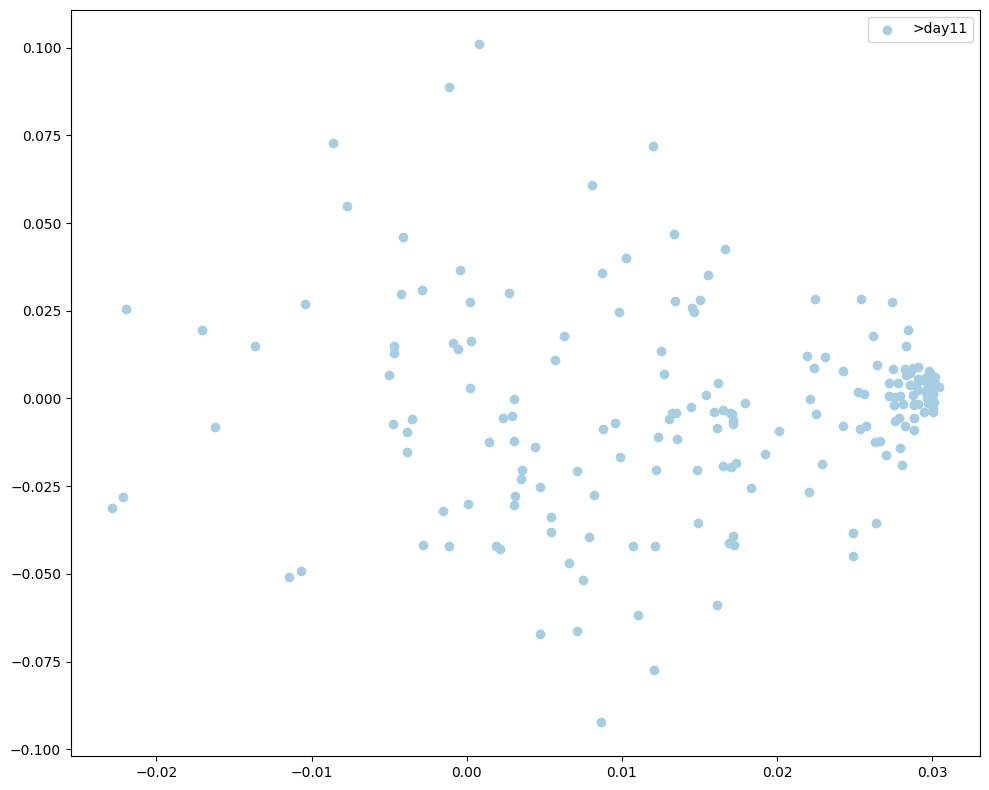

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
c_lst = list(meta.time_group)

conditions = set(c_lst)
colors = sns.color_palette("Paired", len(conditions))

for i,c in enumerate(conditions):
    idx = [i for i in range(len(c_lst)) if c_lst[i] == c]
    plt.scatter(components[idx,0],components[idx,1], color = colors[i], label = c)
plt.tight_layout()
plt.legend()

plt.show()

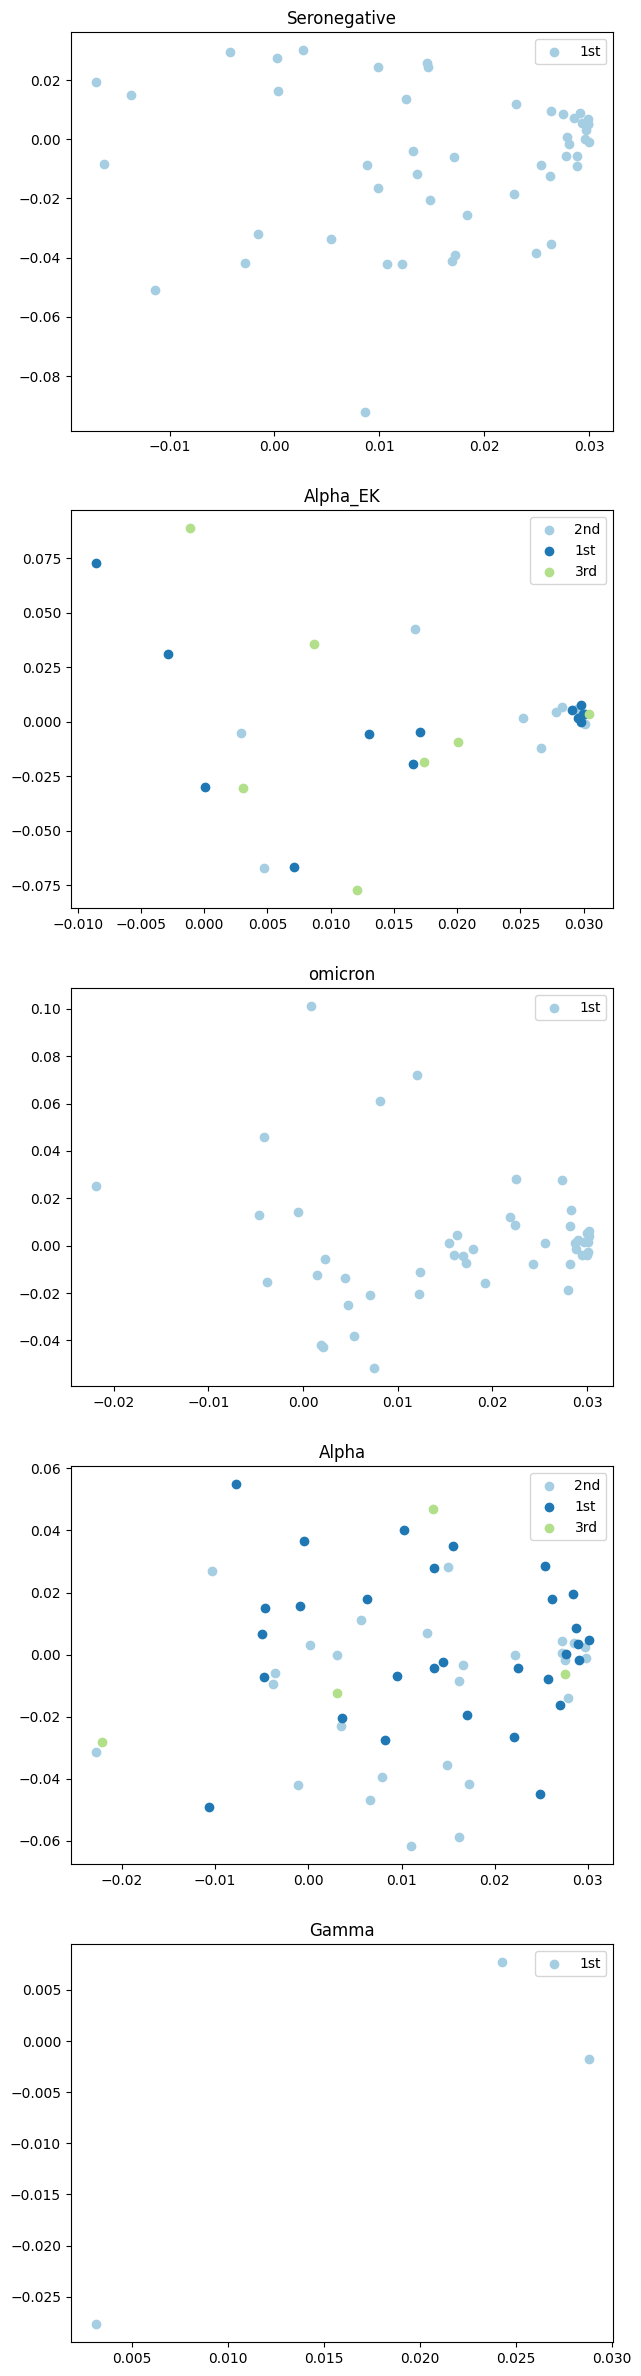

In [63]:
c_lst = meta.group

conditions = set(c_lst)
fig, axs = plt.subplots(len(conditions),figsize=(7, 30))


for k,c in enumerate(conditions):
    idx = [i for i in range(len(c_lst)) if c_lst[i] == c]
    meta_small = meta.iloc[idx]
    comp_small = components[idx,:]
    cond_small = meta_small.sampling.tolist()
    colors = sns.color_palette("Paired", len(set(cond_small)))
    for j,cond in enumerate(set(cond_small)):
        idx_small = [i for i in range(len(cond_small)) if cond_small[i] == cond]
        axs[k].scatter(comp_small[idx_small,0],comp_small[idx_small,1], color = colors[j], label = cond)
    axs[k].legend()
    axs[k].set_title(c)       


plt.show()

In [64]:
conditions

{'Alpha', 'Alpha_EK', 'Gamma', 'Seronegative', 'omicron'}

/nfs/home/students/l.willruth/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


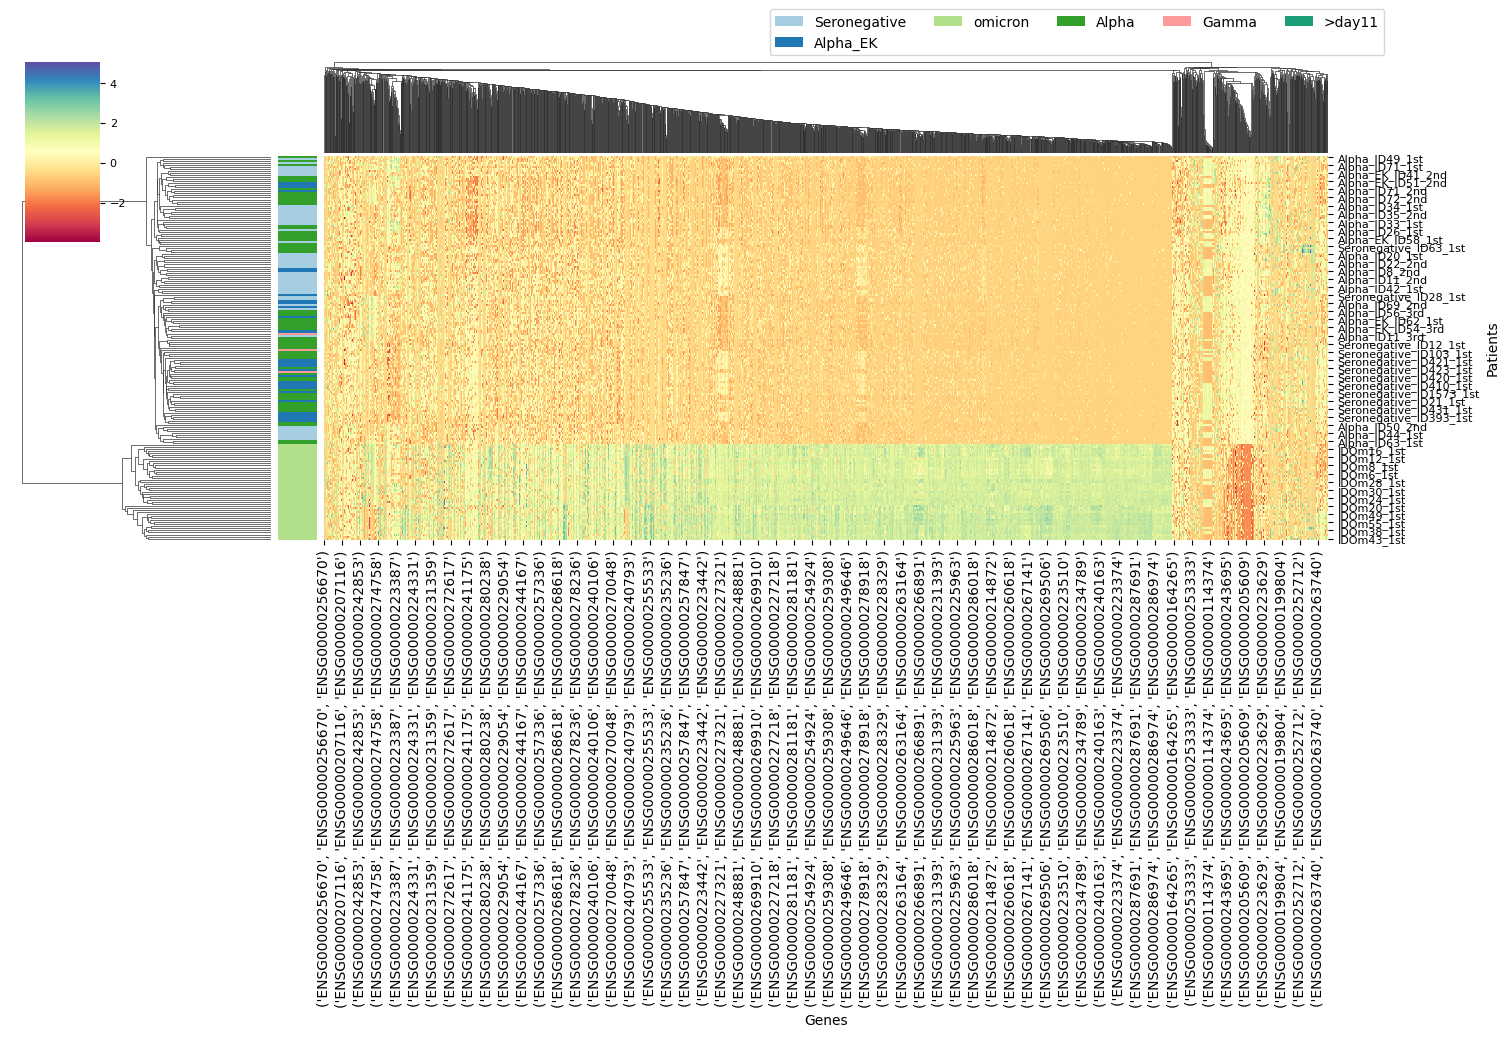

In [68]:
grouping_p = meta.copy()b
species = grouping_p["group"]
colors = sns.color_palette("Paired", len(conditions))
lut = {list(conditions)[i]:colors[i] for i in range(len(conditions))}
row_colors1 = species.map(lut)

clusters = set(meta.time_group)
colors2 = sns.color_palette("Dark2", len(clusters))
species2 = grouping_p["time_group"]
lut2 = {list(clusters)[i]:colors2[i] for i in range(len(clusters))}
row_colors2 = species2.map(lut2)

# plt.rc('font', size=5)  # controls default text sizes
# plt.rc('axes', titlesize=20)  # fontsize of the axes title
# plt.rc('axes', labelsize=20)  # fontsize of the x and y labels
# plt.rc('xtick', labelsize=20)  # fontsize of the tick labels
plt.rc('ytick', labelsize=8)  # fontsize of the tick labels
# plt.rc('legend', fontsize=20)

g = sns.clustermap(norm.T, row_colors=[row_colors1], row_cluster=True, col_cluster=True,figsize=(15, 10),
                   cmap="Spectral")
#g = sns.clustermap(norm.T, row_colors=[row_colors1], row_cluster=True, col_cluster=True,figsize=(15, 10),
#                   cmap="Spectral")

for key in lut:
    l = key
    c = lut[key]
    g.ax_col_dendrogram.bar(0, 0, color=c,
                            label=l, linewidth=0)
for key in lut2:
    l = key
    c = lut2[key]
    g.ax_col_dendrogram.bar(0, 0, color=c,
                            label=l, linewidth=0)
g.ax_col_dendrogram.legend(loc="upper center", ncol=5, bbox_to_anchor=(0.75, 1.5),
                           borderaxespad=0.)

ax = g.ax_heatmap
ax.set_xlabel("Genes")
ax.set_ylabel("Patients")

plt.show()

In [73]:
list(meta["sample_id"])


['Seronegative_ID103_1st',
 'Seronegative_ID110_1st',
 'Seronegative_ID123_1st',
 'Seronegative_ID142_1st',
 'Seronegative_ID143_1st',
 'Seronegative_ID144_1st',
 'Seronegative_ID151_1st',
 'Seronegative_ID1560_1st',
 'Seronegative_ID1562_1st',
 'Seronegative_ID1573_1st',
 'Seronegative_ID21_1st',
 'Seronegative_ID28_1st',
 'Seronegative_ID29_1st',
 'Seronegative_ID342_1st',
 'Seronegative_ID346_1st',
 'Seronegative_ID362_1st',
 'Seronegative_ID366_1st',
 'Seronegative_ID368_1st',
 'Seronegative_ID375_1st',
 'Seronegative_ID376_1st',
 'Seronegative_ID377_1st',
 'Seronegative_ID393_1st',
 'Seronegative_ID398_1st',
 'Seronegative_ID403_1st',
 'Seronegative_ID405_1st',
 'Seronegative_ID410_1st',
 'Seronegative_ID417_1st',
 'Seronegative_ID419_1st',
 'Seronegative_ID420_1st',
 'Seronegative_ID421_1st',
 'Seronegative_ID422_1st',
 'Seronegative_ID423_1st',
 'Seronegative_ID427_1st',
 'Seronegative_ID429_1st',
 'Seronegative_ID430_1st',
 'Seronegative_ID431_1st',
 'Seronegative_ID433_1st',
 

## read batch corrected data and plot

In [ ]:
version = "v1"
counts = False

In [ ]:
corrected = pd.read_csv(f"data/batch_corrected/corrected_tpms_{version}.csv")
corrected.head()

In [ ]:
# truncate decimals in genecounts
if counts:
    for i in corrected.columns:      
        try:
            corrected[[i]] = corrected[[i]].astype(int)
        except:
            pass

In [ ]:
# log transformation
import numpy as np
minimal = corrected.min().min()
if minimal <= 0:
    corrected += np.abs(minimal - 0.01)
corrected = np.log2(corrected)

#top 2000 expressed genes
size = 2000
intersec_genes_list = corrected.index
if size is not None:  # std selection
    std_genes = corrected.std(axis=1)
    std_genes, intersec_genes_list = zip(*sorted(zip(std_genes, intersec_genes_list)))
    genes_for_expr = list(intersec_genes_list)[len(std_genes) - size:]
    intersec_genes = set(genes_for_expr)
    
corrected = corrected.loc[genes_for_expr]

#z scoring
from scipy import stats
norm = pd.DataFrame((stats.zscore(corrected.T)).T, columns=corrected.columns, index=corrected.index)
norm.shape

In [ ]:
#PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(norm.T)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=norm.index)

components = pca.components_.T

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
c_lst = list(meta.group)

conditions = set(c_lst)
colors = sns.color_palette("Paired", len(conditions))

for i,c in enumerate(conditions):
    idx = [i for i in range(len(c_lst)) if c_lst[i] == c]
    plt.scatter(components[idx,0],components[idx,1], color = colors[i], label = c)
plt.tight_layout()
plt.legend()

plt.show()

In [ ]:
c_lst = meta.group

conditions = set(c_lst)
fig, axs = plt.subplots(len(conditions),figsize=(7, 30))


for k,c in enumerate(conditions):
    idx = [i for i in range(len(c_lst)) if c_lst[i] == c]
    meta_small = meta.iloc[idx]
    comp_small = components[idx,:]
    cond_small = meta_small.sampling.tolist()
    colors = sns.color_palette("Paired", len(set(cond_small)))
    for j,cond in enumerate(set(cond_small)):
        idx_small = [i for i in range(len(cond_small)) if cond_small[i] == cond]
        axs[k].scatter(comp_small[idx_small,0],comp_small[idx_small,1], color = colors[j], label = cond)
    axs[k].legend()
    axs[k].set_title(c)       


plt.show()

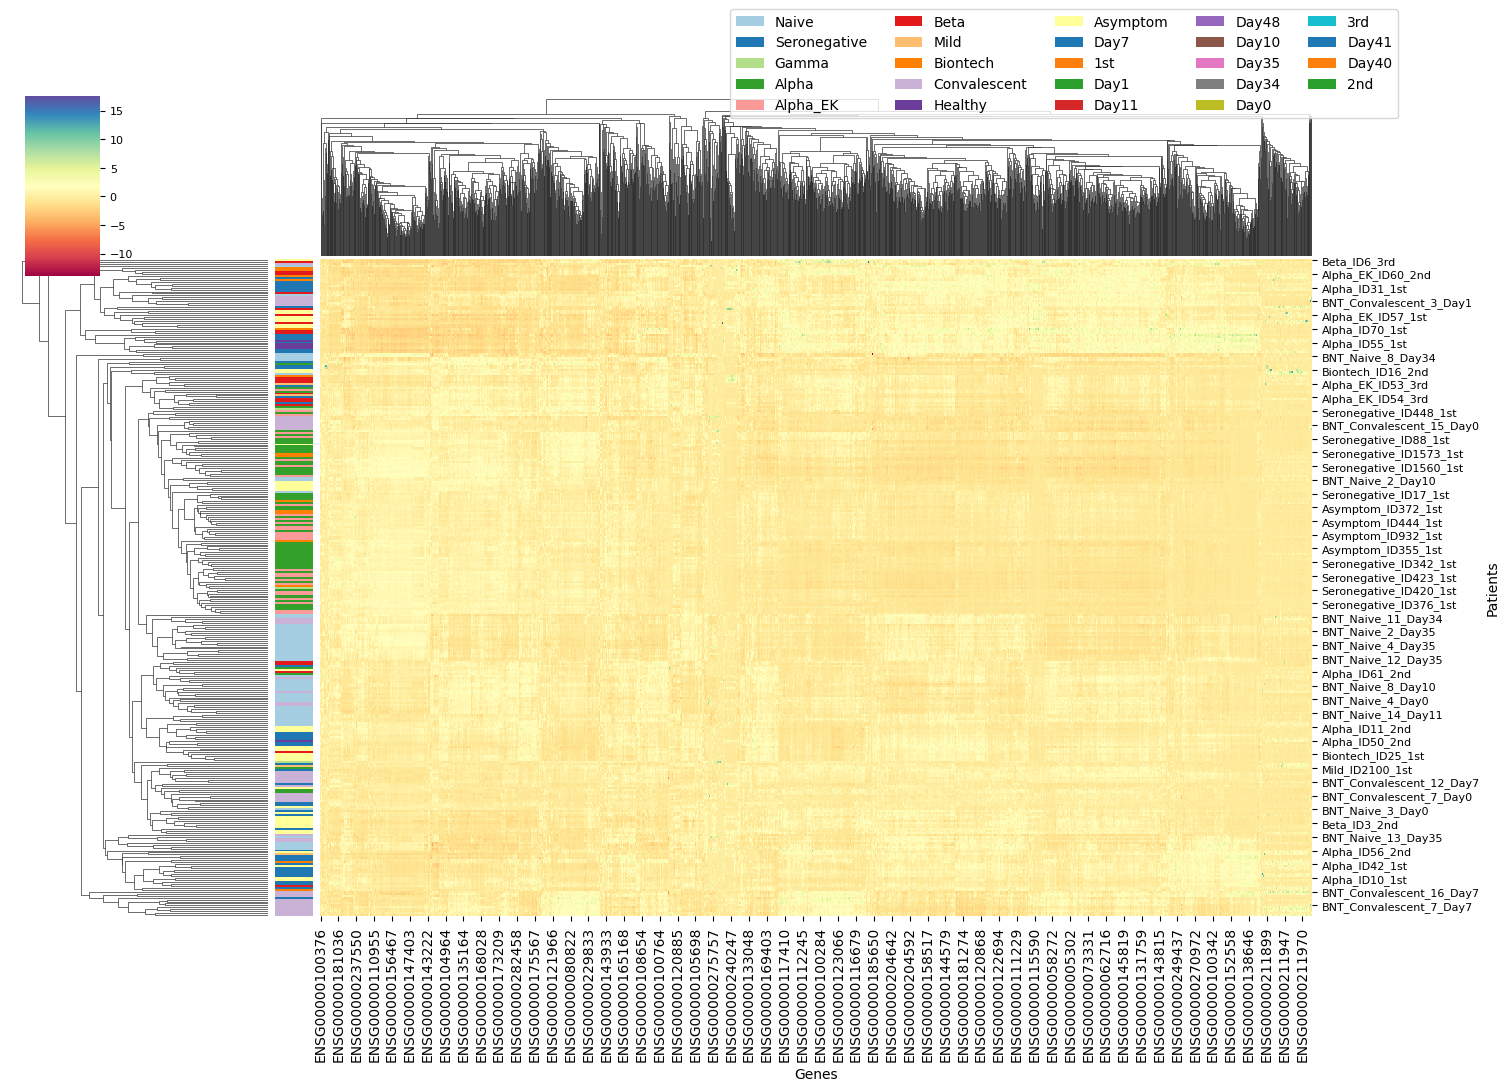

In [62]:
grouping_p = meta.copy()
species = grouping_p["group"]
colors = sns.color_palette("Paired", len(conditions))
lut = {list(conditions)[i]:colors[i] for i in range(len(conditions))}
row_colors1 = species.map(lut)

clusters = set(meta.sampling)
colors2 = sns.color_palette("tab10", len(clusters))
species2 = grouping_p["sampling"]
lut2 = {list(clusters)[i]:colors2[i] for i in range(len(clusters))}
row_colors2 = species2.map(lut2)

# plt.rc('font', size=5)  # controls default text sizes
# plt.rc('axes', titlesize=20)  # fontsize of the axes title
# plt.rc('axes', labelsize=20)  # fontsize of the x and y labels
# plt.rc('xtick', labelsize=20)  # fontsize of the tick labels
plt.rc('ytick', labelsize=8)  # fontsize of the tick labels
# plt.rc('legend', fontsize=20)

# g = sns.clustermap(norm.T, row_colors=[row_colors1,row_colors2], row_cluster=True, col_cluster=True,figsize=(15, 10),
#                   cmap="Spectral")
g = sns.clustermap(norm.T, row_colors=[row_colors1], row_cluster=True, col_cluster=True,figsize=(15, 10),
                   cmap="Spectral")

for key in lut:
    l = key
    c = lut[key]
    g.ax_col_dendrogram.bar(0, 0, color=c,
                            label=l, linewidth=0)
for key in lut2:
    l = key
    c = lut2[key]
    g.ax_col_dendrogram.bar(0, 0, color=c,
                            label=l, linewidth=0)
g.ax_col_dendrogram.legend(loc="upper center", ncol=5, bbox_to_anchor=(0.75, 1.5),
                           borderaxespad=0.)

ax = g.ax_heatmap
ax.set_xlabel("Genes")
ax.set_ylabel("Patients")

plt.show()